V1 ['Vin', '0'] 1
R1 ['Vin', 'n1'] 10k
R2 ['n1', 'Vout'] 10k
C1 ['n1', '0'] 10n
C2 ['Vout', '0'] 10n
IOP1 ['Vout', 'n1', '0'] 100


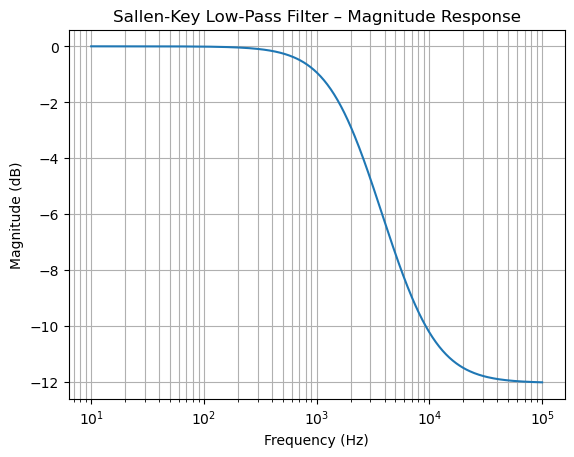

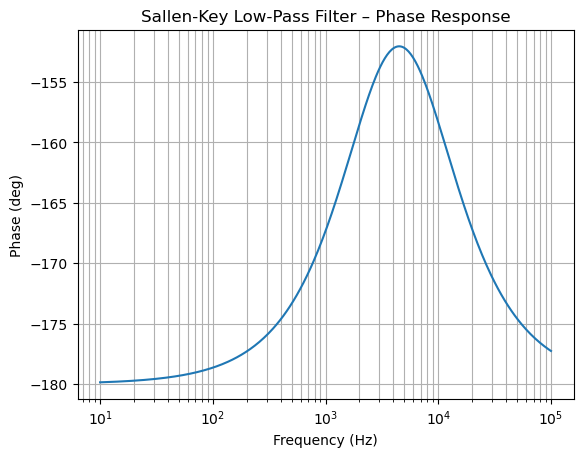

In [ ]:
import translator 
import Circuit as circ
import numpy as np

components = translator.parse_netlist('TestCircuit.txt')
circuit = translator.build_circuit(components)
op = [i for i in circuit.components if isinstance(i, circ.IdealOpAmp)][0]

import matplotlib.pyplot as plt
f = np.logspace(1, 5, 400)           
mag = np.zeros_like(f, dtype=float)
phase = np.zeros_like(f, dtype=float)

for i, freq in enumerate(f):
    omega = 2 * np.pi * freq
    circuit.setFrequency(omega)
    V = circuit.solveSystem()
    Vout = V[op.Vout]
    mag[i] = 20 * np.log10(np.abs(Vout))
    phase[i] = np.angle(Vout, deg=True)


plt.figure()
plt.semilogx(f, mag)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Sallen‑Key Low‑Pass Filter – Magnitude Response")
plt.grid(True, which='both')


plt.figure()
plt.semilogx(f, phase)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (deg)")
plt.title("Sallen‑Key Low‑Pass Filter – Phase Response")
plt.grid(True, which='both')
plt.show()